<a href="https://colab.research.google.com/github/Nayab-05/93_Python_Data_Analytics_Projects/blob/main/Bank_Market_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# 🔹 Task 1: Data Preparation

In [1]:
# 1️⃣ Load CSV file

In [2]:
import pandas as pd

df = pd.read_csv(r"/content/bank.csv")
print(df.head())
print(df.info())


   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 

In [4]:
# 2️⃣ Remove duplicates & irrelevant data

In [6]:
df.drop_duplicates(inplace=True)


In [7]:
# 3️⃣ Check & handle missing values

In [8]:
print(df.isnull().sum())


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [10]:
# 4️⃣ Encode categorical data

In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Because most features are nominal and have no ordinal relationship.

In [14]:
# 🔹 Task 2: Exploratory Data Analysis (EDA)

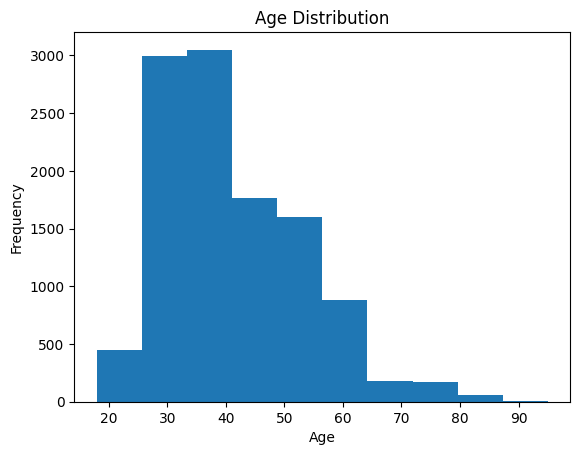

In [15]:
# 📊 Histogram
import matplotlib.pyplot as plt

plt.hist(df['age'])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


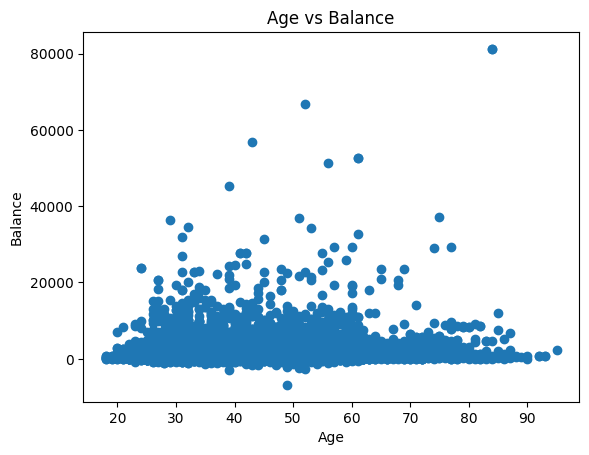

In [16]:
# 📊 Scatter Plot
plt.scatter(df['age'], df['balance'])
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Age vs Balance")
plt.show()


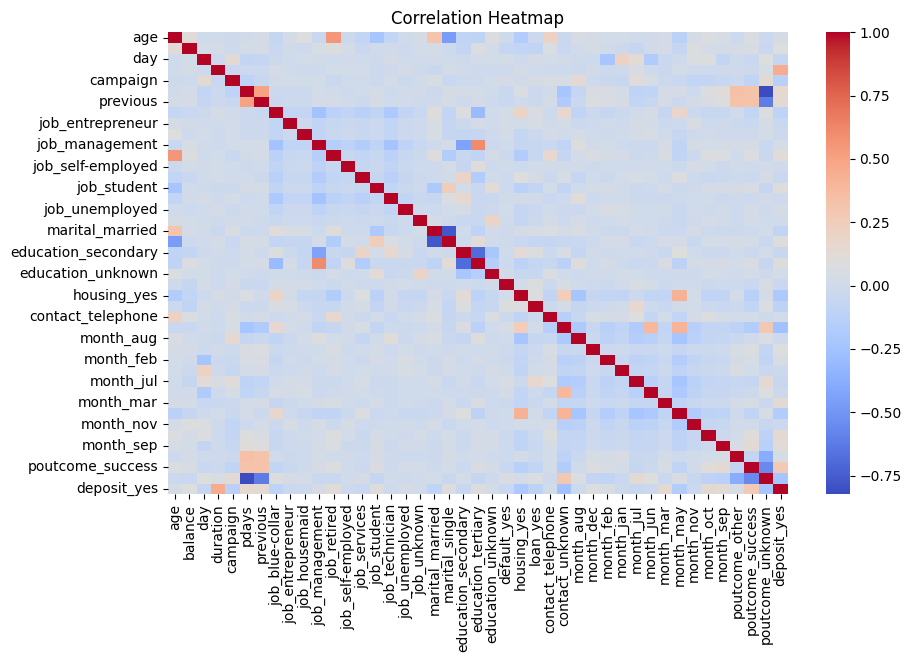

In [17]:
# 🔥 Heatmap (Correlation)
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


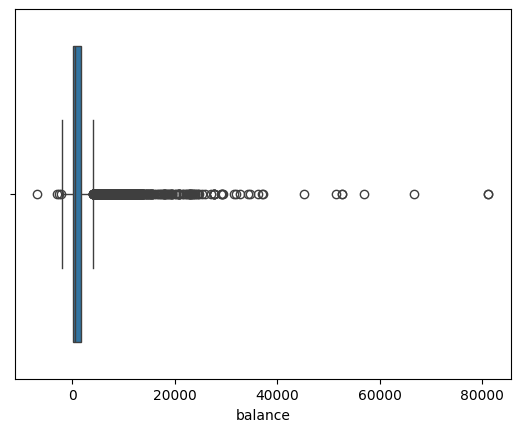

In [18]:
# 🚨 Outlier Detection
sns.boxplot(x=df['balance'])
plt.show()



In [19]:
# 📐 Statistical Measure
df_encoded.corr()['deposit_yes'].sort_values(ascending=False).head()


,deposit_yes
deposit_yes,1.000000
duration,0.451919
poutcome_success,0.286642
pdays,0.151593
previous,0.139867


In [20]:
# 🔹 Task 3: Machine Learning Models
# 🎯 Target & Features
X = df_encoded.drop('deposit_yes', axis=1)
y = df_encoded['deposit_yes']


In [21]:
# 🔀 Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [22]:
# 🌳 Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.79      0.80      0.80      1742
        True       0.78      0.77      0.78      1607

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [23]:
# 📊 Naïve Bayes
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.70      0.86      0.77      1742
        True       0.80      0.60      0.68      1607

    accuracy                           0.74      3349
   macro avg       0.75      0.73      0.73      3349
weighted avg       0.75      0.74      0.73      3349



In [24]:
# 📍 K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.75      0.76      0.76      1742
        True       0.74      0.72      0.73      1607

    accuracy                           0.74      3349
   macro avg       0.74      0.74      0.74      3349
weighted avg       0.74      0.74      0.74      3349



In [26]:
# 🔁 Cross-Validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, X, y, cv=5)
print("CV Accuracy:", scores.mean())


CV Accuracy: 0.7442269509010333


In [27]:
# 🔹 Task 4 : Support Vector Machine (SVM)
# 📌 Step 1: Import Libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


In [28]:
#  Feature Scaling
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1, gamma='scale'))
])


In [29]:
# Train the Model
svm_model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVC(C=1))])

In [30]:
# Predictions
y_pred_svm = svm_model.predict(X_test)


In [31]:
# Evaluation
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.837264855180651
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1742
        True       0.83      0.84      0.83      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



In [32]:
# Cross-Validation with SVM
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_model, X, y, cv=5)
print("SVM Cross-Validation Accuracy:", svm_scores.mean())


SVM Cross-Validation Accuracy: 0.796193341326823
